**Enter your Names:**  William Yao, William Phan, Emilio Rivera, Ari Anugu

---


    
**Enter your PIDs:**  syao2017, wphan21, emilio532, anugu2
    

# Team Project Part 3: Covid Tracker

#### Description: 
We are planning to find different correlations between COVID-19 vaccinations and the spread of the virus in the United States. While conducting such an analysis, we will also consider how different demographic groups are affected based on vaccination rates, political leanings, and other factors.
 
### Questions: 
Which state handled COVID-19 the best ?

Many states handled COVID-19 differently, by enforcing a variety of mandates and providing a variety of resources to people, such as masks and vaccinations. 

There are many ways we can determine which states handled COVID-19 the best. For instance, we can consider factors such as vaccination rates per state, vaccination mandates, mask mandates, and more. In our analysis, we will attempt to rank how well a state handled COVID-19 by figuring out how well the virus was contained. Although we can consider which state had the lowest number of cases, such a number would be an inadequate measure. 

We will also have to take into account factors such as population and population density. Additionally, factors such as demographics may also be important. In our project, we will also attempt to answer the following questions. Does higher vaccination rates in different states lead to a reduction in the cases and deaths from COVID-19? How are different demographic groups (race, ethnicity, age, sex, etc.) affected by the virus when vaccinated or unvaccinated? If so, why are specific states more likely to have a faster spread of the virus? 

Our inference is that states with higher vaccination rates and with more mandates were able to contain the virus more effectively. Additionally, population density will also contribute to how well a state was at containing the virus.

#### Potential Data Points: 
High density areas, hospitalizations, demographics, rate of vaccinations, political demographic
https://www.cdc.gov/nchs/nvss/vsrr/covid_weekly/index.htm
https://www.cdc.gov/coronavirus/2019-ncov/science/forecasting/mathematical-modeling-outbreak.html
https://covid.cdc.gov/covid-data-tracker/#trends_dailycases
kff.org/state_category/covid-19/

<i>Vaccination data</i>: 
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

<i>Cases and Death data</i>:
https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

<i> State Area and Measurement<i>
https://www.census.gov/geographies/reference-files/2010/geo/state-area.html


Possible questions:
    which state is most likely to get covid?
    Where will covid most likely appear next?
    which state best handled covid?

## Analysis

First we gathered the data about vaccination mandates and mask mandates from the CDC website. Additionally, we gathered data about the population of each state in 2020. We were unable to collect population data from 2021 an 2022 but population data from 2020 should give us an accurate estimate of the population size during the COVID-19 pandemnic. Additionally, we gathered data about the land area of each state which will be useful in calculating the population density.

In [95]:
#Libraries
import requests, pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sklearn.cluster
import sklearn.decomposition

from sklearn.linear_model import LinearRegression

cCasesAndDeaths = pandas.read_csv('cumalitiveCasesAndDeaths.csv')
DCasesAndDeaths = pandas.read_csv('dailyCasesAndDeaths.csv')
vaccinations = pandas.read_csv('vaccinesDelivered.csv')

populationEstimates = pandas.read_csv('PopulationEstimates.csv')

# HealthCareProviderCapacity.csv
# VaccinationMandateByState.csv
healthCareProviderCapacity = pandas.read_csv('HealthCareProviderCapacity.csv')
vaccinationMandateByState = pandas.read_csv('VaccinationMandateByState.csv')

# Data giving us information about land area per state.
landArea = pandas.read_csv('StateAreas.csv')

#State dictionary will be used to map between state abbreviation and name
stateDictionary = pandas.read_csv('StateDictionary.csv')

#Date generated: Tue Apr 05 2022 14:55:59 GMT-0400 (Eastern Daylight Time) for all tables

cCasesAndDeaths.shape, DCasesAndDeaths.shape, vaccinations.shape, populationEstimates.shape, healthCareProviderCapacity.shape, vaccinationMandateByState.shape, landArea.shape 

((65, 7), (65, 9), (60, 8), (3283, 10), (52, 8), (52, 6), (59, 3))

In [96]:
vaccinationMandateByState.head(3)

,Location,Any Mandate in Place?,Description of Mandate or Prohibition,Filed Lawsuit Challenging Federal Vaccine Requirements?,Federal Vaccine Requirement(s) State Is Challenging,Footnotes
0,United States,Yes (23);Prohibited (13); No (15),NaN,Yes (27); No (24),Federal Contractors (27); Employers with 100+ ...,NaN
1,Alabama,Prohibited,State and local governments are prohibited fro...,Yes,Federal Contractors; Employers with 100+ Emplo...,NaN
2,Alaska,No,NaN,Yes,Federal Contractors; Employers with 100+ Emplo...,1.0


In [97]:
healthCareProviderCapacity.head(3)

,Location,Total Hospital Beds,"Hospital Beds per 10,000 Population",ICU Beds,"ICU Beds per 10,000 Population",Total CHCs,CHC Service Delivery Sites,Footnotes
0,United States,749728,23.5,85247,2.7,1331,11606,NaN
1,Alabama,15035,31.6,1870,3.9,15,144,NaN
2,Alaska,1604,22.6,130,1.8,27,193,NaN


In [98]:
landArea.head(3)

,State,Sq. Mi.,Sq. Km.
0,Total,"3,535,932","9,158,022"
1,United States,"3,531,905","9,147,593"
2,Alabama,"50,645","131,171"


In [99]:
cCasesAndDeaths.head(3)

,Location,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",COVID-19 Fatality Rate,Footnotes
0,United States,"78,798,989",NaN,"944,830",NaN,0.012,1.0
1,Alabama,"1,276,580",NaN,"18,102",NaN,0.014,NaN
2,Alaska,"237,754",NaN,"1,163",NaN,0.005,NaN


In [100]:
DCasesAndDeaths.head(3)

,Location,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Daily Cases Per Million Population,Percent Change in Cases Over 14 Days,Daily Change in Cumulative Deaths,Daily Deaths (7-Day Rolling Average),Daily Deaths Per Million Population,Percent Change in Deaths Over 14 Days
0,United States,"65,491","74,750",227.0,-0.646,"2,941","1,742",5.0,-0.325
1,Alabama,"1,225",938,191.0,-0.761,95,45,9.0,0.098
2,Alaska,0,421,575.0,-0.679,0,3,4.0,0.048


In [101]:
vaccinations.head(3)

,Location,Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"688,186,745","551,855,907",0.802,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"9,229,440","6,087,103",0.660,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"1,436,865","1,093,808",0.761,"500,864",0.685,"445,530",0.609


### Data Cleaning

<i>**Goal**</i>: 
* We will clean up any data that will be used in our analysis

<i>What will we change?</i>
* Replace extreme values
* Make sure all data units are correct 
* Make sure all values in the table have the correct data types.
* Replace NaN values with a value that better suits the data
* Get rid of any messy text such as punctionation, whitespace, etc.

In [102]:
#merge all the data together
merged = cCasesAndDeaths.merge(DCasesAndDeaths, how = 'inner', on = ['Location'])
merged = merged.merge(vaccinations, how = 'inner', on = ['Location'])
merged.dropna(axis = 1)
merged.head(3)

,Location,Number of COVID-19 Cases,"COVID-19 Cases per 1,000,000 Population",Deaths from COVID-19,"COVID-19 Deaths per 1,000,000 Population",COVID-19 Fatality Rate,Footnotes,Daily Change in Cumulative Cases,Daily Cases (7-Day Rolling Average),Daily Cases Per Million Population,...,Daily Deaths (7-Day Rolling Average),Daily Deaths Per Million Population,Percent Change in Deaths Over 14 Days,Total COVID-19 Vaccines Delivered,Total COVID-19 Vaccines Administered,Share of Delivered Vaccines That Have Been Administered,Number of People Who Have Been Vaccinated with At Least One Dose,Share of Population Vaccinated with At Least One Dose,Number of People Who Have Been Fully Vaccinated,Share of Population Fully Vaccinated
0,United States,"78,798,989",NaN,"944,830",NaN,0.012,1.0,"65,491","74,750",227.0,...,"1,742",5.0,-0.325,"688,186,745","551,855,907",0.802,"253,307,984",0.763,"215,253,201",0.648
1,Alabama,"1,276,580",NaN,"18,102",NaN,0.014,NaN,"1,225",938,191.0,...,45,9.0,0.098,"9,229,440","6,087,103",0.660,"3,031,464",0.618,"2,459,363",0.502
2,Alaska,"237,754",NaN,"1,163",NaN,0.005,NaN,0,421,575.0,...,3,4.0,0.048,"1,436,865","1,093,808",0.761,"500,864",0.685,"445,530",0.609


In [103]:
#grab specific columns we want to examine

data = merged[['Location', 'Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']]
df = data.copy()

#Remove commas and make data type to an int for various columns
df['Number of COVID-19 Cases'] = data['Number of COVID-19 Cases'].map(lambda s: int(s.replace(',', '')))
df['Deaths from COVID-19'] = data['Deaths from COVID-19'].map(lambda s: int(s.replace(',', '')))
df['Total COVID-19 Vaccines Administered'] = data['Total COVID-19 Vaccines Administered'].map(lambda s: int(s.replace(',', '')))
df['Daily Change in Cumulative Deaths'] = data['Daily Change in Cumulative Deaths'].map(lambda s: int(s.replace(',', '')))

df.head(3)

,Location,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths
0,United States,78798989,944830,551855907,2941
1,Alabama,1276580,18102,6087103,95
2,Alaska,237754,1163,1093808,0


In [104]:
#grab specific columns we want to examine
data1 = merged[['Location', 'Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']]
data1 = data1[1:]
data1.head(3)

,Location,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths
1,Alabama,"1,276,580","18,102","6,087,103",95
2,Alaska,"237,754","1,163","1,093,808",0
3,Arizona,"1,973,479","27,876","11,508,661",86


In [105]:
#quantatify the data to make it usable
quantative = data1.copy()
columns = ['Number of COVID-19 Cases', 'Deaths from COVID-19', 'Total COVID-19 Vaccines Administered', 'Daily Change in Cumulative Deaths']

#clean the data so that we remove all commas, and can convert to int values later
quantative = quantative[:].astype('string')
quantative = quantative.apply(lambda x: x.str.replace(',', ''))
quantative[columns] = quantative.iloc[:, 1:].astype(int)
dMatrix = pandas.DataFrame(index = quantative.Location, columns = quantative.Location, dtype = float)
#create a copy so we can preserve the Locations column with all State names
copy = quantative.copy()
#set the index to be the state names
quantative = quantative.set_index('Location')

#normalize the data
norm = (quantative - quantative.mean()) / quantative.std()
norm
#create a distance matrix so that we can see distance correlations between states
for r in range(len(dMatrix.index)):
    for c in range(r):
        dMatrix.iloc[r, c] = dMatrix.iloc[c, r] = numpy.linalg.norm(norm.iloc[r] - norm.iloc[c])

dMatrix = dMatrix.fillna(0)
dMatrix.head(3)



Location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,American Samoa,Guam,Northern Mariana Islands,Puerto Rico
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,0.000000,1.445582,0.772499,0.728530,7.793453,0.854347,1.012354,1.384244,1.461169,6.574382,...,1.489330,0.808503,0.980938,0.970112,0.501993,1.459327,1.565162,1.532184,1.561352,1.180084
Alaska,1.445582,0.000000,2.045208,0.730126,8.998264,1.118464,0.733484,0.092345,0.066256,7.986529,...,0.081582,1.942127,1.353998,0.487511,1.370772,0.062977,0.170890,0.135959,0.165327,0.513135
Arizona,0.772499,2.045208,0.000000,1.328161,7.088034,1.096026,1.421846,1.970406,2.061180,6.160928,...,2.093296,0.634585,1.071144,1.620617,0.798234,2.064182,2.186825,2.151419,2.182490,1.688014


#### Dataframe containing (State, vaccination mandate, population, cases, Land area per state) 
Here we will create a new dataframe that will give us information about the state vaccination mandate, population, land area per state, and will will also include a column containing population density.

In [106]:
##vaccine mandate by state all will be saved in seperate doc
vaxMS = pandas.read_csv('VaccinationMandatebyState.csv')
## remove row 0
vms = vaxMS.copy()
vms = vms[1:]
##Any mandate will be yes 1, no 0, no and prohibited will be the same
vms = pandas.DataFrame({'Location': vms.Location, 'VaxMandate': vms['Any Mandate in Place?'], 'Lawsuit': vms['Filed Lawsuit Challenging Federal Vaccine Requirements?']})
for i in range(1,52):
    if vms.loc[i, 'VaxMandate'] == 'Yes':
        vms.loc[i, 'VaxMandate'] = 1
    elif vms.loc[i, 'VaxMandate'] == 'No' or vms.loc[i, 'VaxMandate'] == 'Prohibited':
        vms.loc[i, 'VaxMandate'] = 0
    if vms.loc[i, 'Lawsuit'] == 'Yes':
        vms.loc[i, 'Lawsuit'] = 1
    elif vms.loc[i, 'Lawsuit'] == 'No':
        vms.loc[i, 'Lawsuit'] = 0
vms.head(3)


,Location,VaxMandate,Lawsuit
1,Alabama,0,1
2,Alaska,0,1
3,Arizona,0,1


In [107]:
#clean populationEstimates
populationEstimates.replace(',','', regex=True, inplace=True)
populationEstimates.fillna(0,inplace=True)

#Convert string to int
populationEstimates['Population 2020'] = populationEstimates['Population 2020'].astype(int)

#Group population by state
populationByState = populationEstimates.groupby('State')['Population 2020'].sum()
populationByState.drop(0, inplace=True)
populationByState = populationByState.to_frame()

#merge land area with population
withAbbrevLand = landArea.merge(stateDictionary, how='inner', on='State')
populationByState.reset_index(inplace=True)
populationByState = populationByState.rename(columns={"State":"Code"})
populationAndLand = populationByState.merge(withAbbrevLand, how='inner', on='Code')
populationAndLand.replace(',','', regex=True, inplace=True)

#Calculate population density population/landArea
populationAndLand['Population Density'] = populationAndLand['Population 2020']/populationAndLand['Sq. Mi.'].astype(int)

#merge vaccine mandates
vms.rename(columns={"Location":"State"}, inplace=True)
vacPopLand = populationAndLand.merge(vms, how='inner', on='State')

#merge cases, death
df.rename(columns={"Location":"State"}, inplace=True)
mainFrame =  vacPopLand.merge(df, how='inner', on='State')
mainFrame['Cases Per Population Density'] = mainFrame['Number of COVID-19 Cases'] / mainFrame['Population Density']
mainFrame['Deaths Per Population Density'] = mainFrame['Deaths from COVID-19'] / mainFrame['Population Density']
mainFrame['Vaccinations Per Population Density'] = mainFrame['Total COVID-19 Vaccines Administered'] / mainFrame['Population Density']
mainFrame

,Code,Population 2020,State,Sq. Mi.,Sq. Km.,Abbreviation,Population Density,VaxMandate,Lawsuit,Number of COVID-19 Cases,Deaths from COVID-19,Total COVID-19 Vaccines Administered,Daily Change in Cumulative Deaths,Cases Per Population Density,Deaths Per Population Density,Vaccinations Per Population Density
0,AK,1466782,Alaska,570641,1477953,Alaska,2.570411,0,1,237754,1163,1093808,0,92496.485718,452.456795,425538.144679
1,AL,10048558,Alabama,50645,131171,Ala.,198.411650,0,1,1276580,18102,6087103,95,6433.997206,91.234562,30679.161272
2,AR,6023048,Arkansas,52035,134771,Ark.,115.749938,0,1,817798,10381,4081816,40,7065.213316,89.684714,35264.088143
3,AZ,14303004,Arizona,113594,294207,Ariz.,125.913376,0,1,1973479,27876,11508661,86,15673.307057,221.390300,91401.417327
4,CA,79076446,California,155779,403466,Calif.,507.619422,1,0,8946146,84728,71306336,260,17623.726764,166.912447,140472.040382
5,CO,11547428,Colorado,103642,268431,Colo.,111.416491,1,0,1309778,11750,10299034,21,11755.692391,105.460151,92437.249388
6,CT,7211888,Connecticut,4842,12542,Conn.,1489.444031,1,0,721954,10443,7277732,5,484.713749,7.011341,4886.207099
7,DC,1379090,District of Columbia,61,158,D.C.,22608.032787,1,0,134214,1317,1412520,0,5.936563,0.058254,62.478678
8,DE,1979896,Delaware,1949,5047,Del.,1015.852232,1,0,256207,2703,1729273,0,252.208926,2.660820,1702.287937
9,FL,43076374,Florida,53625,138887,Fla.,803.289026,0,1,5818706,69553,36035360,598,7243.602009,86.585274,44859.768838


In [109]:
mainCopy = mainFrame.copy()
mainDF = mainCopy[['Code', 'Cases Per Population Density', 'Deaths Per Population Density', 'Vaccinations Per Population Density']]
mainDF

mainColumns = ['Cases Per Population Density', 'Deaths Per Population Density', 'Vaccinations Per Population Density']
mainQuantative = mainDF.copy()

mainQuantative[mainColumns] = mainQuantative.iloc[:, 1:].astype(float)
mainMatrix = pandas.DataFrame(index = mainQuantative.Code, columns = mainQuantative.Code, dtype = float)

#create a copy so we can preserve the Locations column with all State names
quantCopy = mainQuantative.copy()
#set the index to be the state names
mainQuantative = mainQuantative.set_index('Code')

#normalize the data
mainNorm = (mainQuantative - mainQuantative.mean()) / mainQuantative.std()
mainNorm

#create a distance matrix so that we can see distance correlations between states
for r in range(len(mainMatrix.index)):
    for c in range(r):
        mainMatrix.iloc[r, c] = mainMatrix.iloc[c, r] = numpy.linalg.norm(mainNorm.iloc[r] - mainNorm.iloc[c])

mainMatrix = mainMatrix.fillna(0)
mainMatrix


Code,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Code,,,,,,,,,,,,,,,,,,,,,
AK,0.000000,9.878429,9.810967,8.238464,7.922401,8.966082,10.860435,10.967226,10.925497,9.727574,...,9.299097,10.019801,5.987770,9.509461,10.218122,10.816857,9.843896,9.861673,10.413268,8.993002
AL,9.878429,0.000000,0.087343,1.917442,2.090851,1.048288,1.152508,1.262251,1.220005,0.233666,...,0.598689,0.230461,4.584498,0.765775,0.613881,1.148296,0.651594,0.424814,0.653178,0.929157
AR,9.810967,0.087343,0.000000,1.881312,2.022397,0.969009,1.183201,1.294623,1.251762,0.153018,...,0.540431,0.246154,4.540048,0.685299,0.609269,1.173218,0.595288,0.371189,0.681971,0.882240
AZ,8.238464,1.917442,1.881312,0.000000,0.999670,1.385165,3.060975,3.173561,3.130612,1.843827,...,1.367883,2.127206,2.683038,2.010268,2.432645,3.047421,2.177473,2.105596,2.560904,1.028304
CA,7.922401,2.090851,2.022397,0.999670,0.000000,1.123407,3.090571,3.205290,3.161943,1.917352,...,1.504783,2.234567,2.778104,1.821490,2.411520,3.051200,2.040952,2.078147,2.626968,1.294989
CO,8.966082,1.048288,0.969009,1.385165,1.123407,0.000000,1.969007,2.083305,2.040068,0.839534,...,0.571798,1.147821,3.827960,0.736416,1.291161,1.928461,0.922628,0.959966,1.514528,0.668255
CT,10.860435,1.152508,1.183201,3.060975,3.090571,1.969007,0.000000,0.115949,0.072817,1.227168,...,1.706201,0.938324,5.708028,1.358321,0.681026,0.083560,1.073690,1.020704,0.501239,2.060380
DC,10.967226,1.262251,1.294623,3.173561,3.205290,2.083305,0.115949,0.000000,0.043727,1.341335,...,1.819762,1.049505,5.822662,1.464840,0.796152,0.166880,1.185503,1.134400,0.613040,2.172147
DE,10.925497,1.220005,1.251762,3.130612,3.161943,2.040068,0.072817,0.043727,0.000000,1.297782,...,1.776320,1.006607,5.779126,1.423427,0.753029,0.130610,1.143561,1.090882,0.570030,2.129040


In [149]:
compCopy = mainFrame.copy()
compDF = compCopy[['Code', 'Cases Per Population Density', 'Vaccinations Per Population Density']]
compDF

compColumns = ['Cases Per Population Density', 'Vaccinations Per Population Density']
quantative1 = compDF.copy()

quantative1[compColumns] = quantative1.iloc[:, 1:].astype(float)
mainCompare = pandas.DataFrame(index = quantative1.Code, columns = quantative1.Code, dtype = float)

#create a copy so we can preserve the Locations column with all State names
quantCopy = quantative1.copy()
#set the index to be the state names
quantative1 = quantative1.set_index('Code')
#normalize the data
compNorm = (quantative1 - quantative1.mean()) / quantative1.std()
compNorm

#create a distance matrix so that we can see distance correlations between states
for r in range(len(compNorm.index)):
    for c in range(r):
        mainCompare.iloc[r, c] = mainCompare.iloc[c, r] = numpy.linalg.norm(compNorm.iloc[r] - compNorm.iloc[c])

mainCompare = mainCompare.fillna(0)
mainCompare

mainCompare["Sum"] = mainCompare.sum(axis=1)
mainCompare = mainCompare.sort_values(by="Sum")
mainCompare


Code,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Sum
Code,,,,,,,,,,,,,,,,,,,,,
MI,8.800979,0.183831,0.118235,1.021284,1.727291,0.863569,0.743757,0.824808,0.793350,0.060718,...,0.221134,2.970241,0.497924,0.237554,0.672046,0.265364,0.062481,0.460273,0.568653,34.145081
IA,8.798488,0.191128,0.126425,1.018094,1.722407,0.858468,0.747517,0.828723,0.797262,0.059687,...,0.227773,2.966197,0.495710,0.237644,0.675514,0.257465,0.060625,0.464712,0.567819,34.173311
GA,8.842975,0.120682,0.060276,1.068320,1.782591,0.920145,0.695943,0.775948,0.744557,0.110032,...,0.160045,3.021244,0.540678,0.220305,0.626145,0.328429,0.114335,0.409332,0.602800,34.226992
NC,8.887090,0.109604,0.087387,1.109808,1.817900,0.954099,0.654409,0.735120,0.703675,0.147950,...,0.137183,3.060309,0.583988,0.172927,0.583452,0.341560,0.151044,0.369894,0.648979,34.333341
FL,8.740658,0.227281,0.148682,0.961953,1.672625,0.810129,0.802357,0.883042,0.851601,0.000000,...,0.269381,2.912682,0.437466,0.297311,0.731227,0.243364,0.006330,0.517392,0.508178,34.442815
WI,8.738504,0.232301,0.154323,0.959197,1.668600,0.805852,0.805341,0.886148,0.854700,0.006330,...,0.274014,2.909325,0.435448,0.297843,0.733995,0.237036,0.000000,0.520772,0.507346,34.462761
NY,8.834280,0.212707,0.168751,1.050486,1.740441,0.875670,0.723721,0.805936,0.774546,0.115169,...,0.239160,2.990962,0.535978,0.193295,0.649666,0.241691,0.113595,0.448409,0.615289,34.688782
IL,8.756508,0.253460,0.186644,0.973063,1.668074,0.803444,0.797785,0.879643,0.848203,0.062744,...,0.289265,2.915837,0.458100,0.271296,0.724461,0.195886,0.057628,0.518606,0.539050,34.714986
AR,8.850762,0.085451,0.000000,1.085109,1.810529,0.951364,0.685076,0.763080,0.731950,0.148682,...,0.132743,3.041875,0.554869,0.252934,0.618539,0.382480,0.154323,0.396498,0.606618,34.832097


### Visualization

* We will make a line graph that shows the cases and deaths overtime
* Line graph showing vaccination rate overtime
* Another line graph showing the trends of the number of cases, deaths, and vaccinations. Such graph will help us to observe any useful patterns between vaccinations and COVID-19 spread.
* We will also make use of scatter plots and bargraphs in order to find more useful patterns in our analysis.

(0.0, 10000000.0)

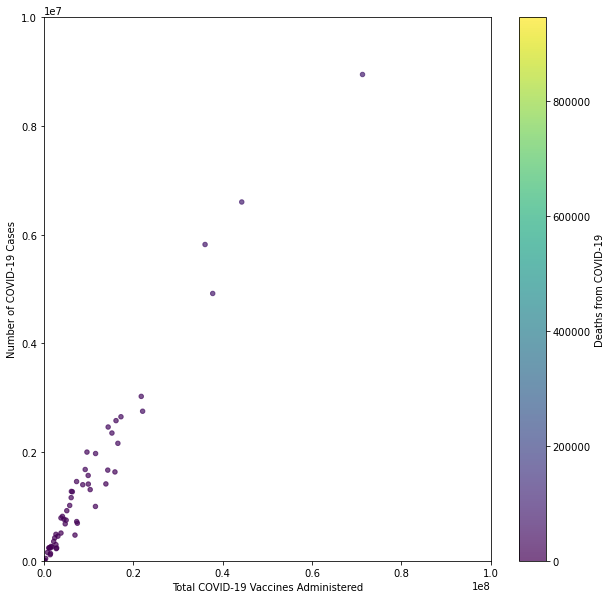

In [ ]:
ax = df.plot.scatter('Total COVID-19 Vaccines Administered', 'Number of COVID-19 Cases',c = 'Deaths from COVID-19',figsize=(10,10), colormap=plt.cm.viridis, sharex = False, alpha = 0.7)
ax.set_xlim(0, 100000000)
ax.set_ylim(0, 10000000)

<AxesSubplot:xlabel='State'>

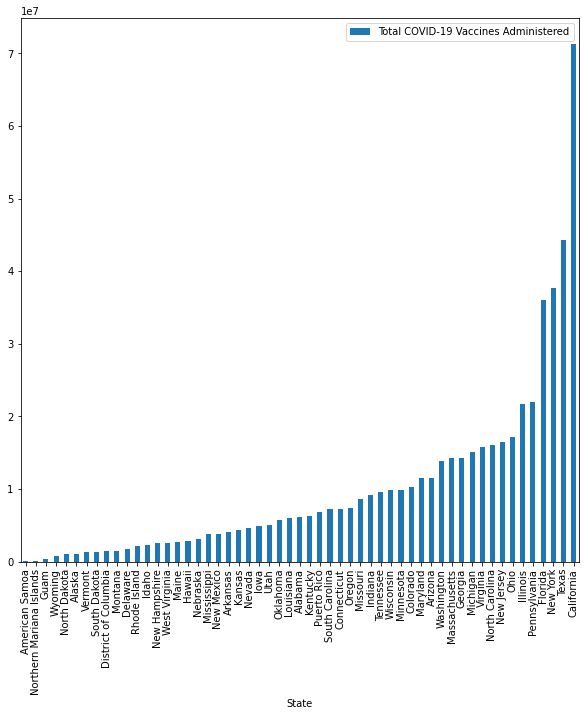

In [ ]:

#Create a bar graph that show the relationship between 
#the vaccines administed in each state

df2 = df.copy()
df2.drop(0, inplace=True)
df2.sort_values('Total COVID-19 Vaccines Administered').plot.bar('State', 'Total COVID-19 Vaccines Administered', figsize=(10,10))

<AxesSubplot:xlabel='State'>

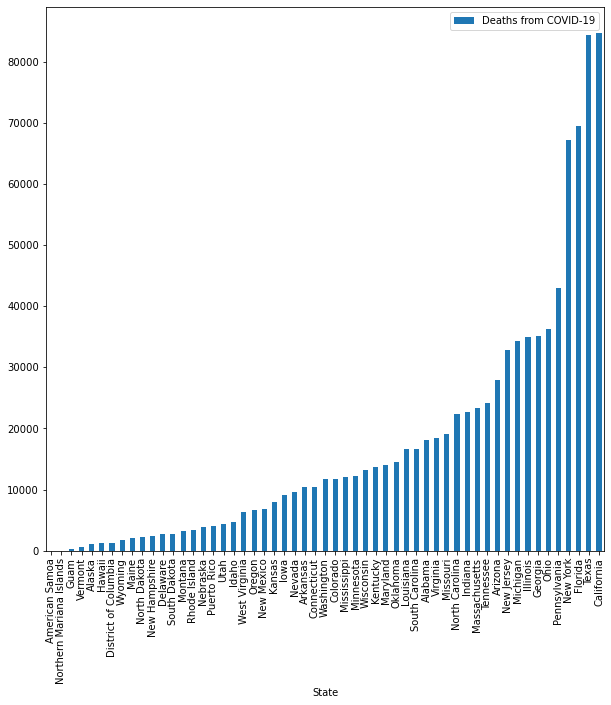

In [ ]:
#Create a bar graph that show the relationship between 
#the deaths in each state
df2.sort_values('Deaths from COVID-19').plot.bar('State', 'Deaths from COVID-19', figsize=(10,10))

<AxesSubplot:xlabel='State'>

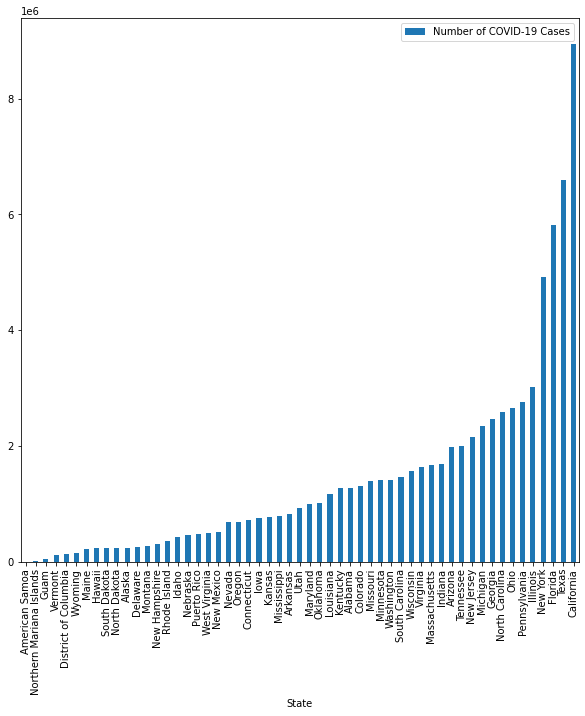

In [ ]:
#Create a bar graph that show the relationship between 
#the number of cases in each state
df2.sort_values('Number of COVID-19 Cases').plot.bar('State', 'Number of COVID-19 Cases', figsize=(10,10))

C:\Users\wphan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


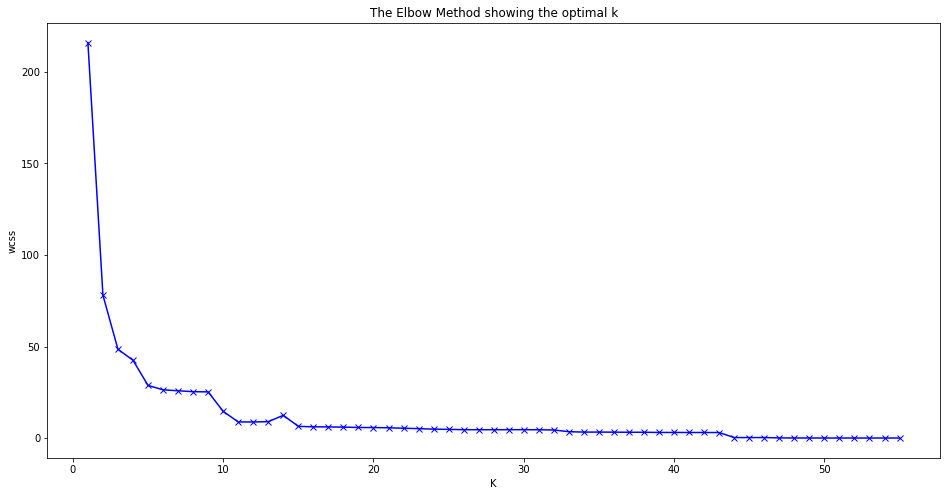

In [116]:
#calculate the inertia values and max distances from eachother, also check clustering to see which would be optimal K value

inertiaTable = pandas.DataFrame(columns = ['K', 'Inertia'])

kmeans = sklearn.cluster.KMeans(n_init = 1, max_iter = 10)

wcss = []

for i in range(1, 56):
    kmeans.n_clusters = i
    kmeans.init = norm.iloc[0:i]
    kmeans.fit(norm)
    inertia = kmeans.inertia_
    wcss.append(inertia)

k = range(1, 56)
inertiaTable.Inertia = wcss
inertiaTable.K = k[:]

inertiaTable

plt.figure(figsize=(16,8))
plt.plot(k, wcss, 'bx-')
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

C:\Users\wphan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


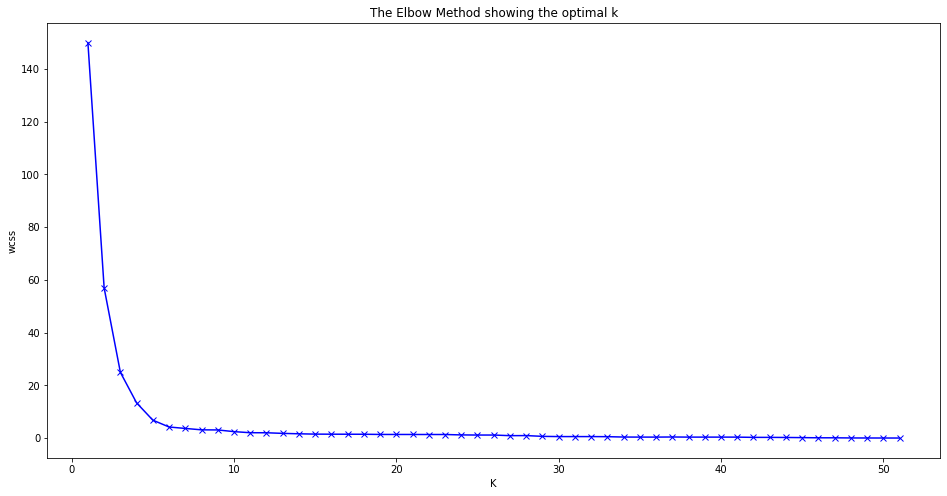

In [118]:
#calculate the inertia values and max distances from eachother, also check clustering to see which would be optimal K value

mainInertia  = pandas.DataFrame(columns = ['K', 'Inertia'])

kmeansMain = sklearn.cluster.KMeans(n_init = 1, max_iter = 10)

wcss1 = []

for i in range(1, 52):
    kmeansMain.n_clusters = i
    kmeansMain.init = mainNorm.iloc[0:i]
    kmeansMain.fit(mainNorm)
    inertia1 = kmeansMain.inertia_
    wcss1.append(inertia1)

k1 = range(1, 52)
mainInertia.Inertia = wcss1
mainInertia.K = k1[:]

mainInertia

plt.figure(figsize=(16,8))
plt.plot(k1, wcss1, 'bx-')
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Analyze Data
* We may be able to use linear regression to model see different correlations between variables.

In [123]:
#based off of the Elbow graph, the elbow appears to be at 5, hence we will use K = 5 for the clustering

stateCluster = pandas.DataFrame(columns = ['State', 'Cluster'])

#make our graph use K=5
km = sklearn.cluster.KMeans(n_clusters = 5, n_init = 1, max_iter = 10)
#initialize the first 5 states to be the 5 centroids
km.init = norm.iloc[0:5]
km.fit_predict(norm)
labels = km.labels_
stateCluster.Cluster = labels
stateCluster.index = copy.Location
stateCluster.State = quantative.index

stateCluster = stateCluster.sort_values('Cluster')
stateCluster.head()



,State,Cluster
Location,,
Missouri,Missouri,0
Nebraska,Nebraska,1
Montana,Montana,1
Northern Mariana Islands,Northern Mariana Islands,1
Nevada,Nevada,1


In [134]:
#based off of the Elbow graph, the elbow appears to be at 5, hence we will use K = 5 for the clustering

mainCluster = pandas.DataFrame(columns = ['State', 'Cluster'])

#make our graph use K=5
kmMain = sklearn.cluster.KMeans(n_clusters = 5, n_init = 1, max_iter = 10)
#initialize the first 5 states to be the 5 centroids
kmMain.init = mainNorm.iloc[0:5]
kmMain.fit_predict(mainNorm)
labels1 = kmMain.labels_
mainCluster.Cluster = labels1
mainCluster.index = mainCopy.Code
mainCluster.State = mainQuantative.index

mainCluster = mainCluster.sort_values('Cluster')
mainCluster.head()

,State,Cluster
Code,,
AK,AK,0
NH,NH,1
NJ,NJ,1
ME,ME,1
MD,MD,1


In [ ]:
#calculate the maxDistances within each cluster, calculate the amount of states within each cluster

size = pandas.DataFrame()
group = stateCluster.groupby('Cluster')

size['Cluster'] = range(5)

#Calculate Size
size['Size'] = group.size()

#Calculate distance matrixes

#cluster0
group0 = group.get_group(0)
matrix0 = dMatrix.loc[group0.index, group0.index]
matrix0 = matrix0.fillna(0)

#cluster1
group1 = group.get_group(1)
matrix1 = dMatrix.loc[group1.index, group1.index]
matrix1 = matrix1.fillna(0)

#cluster2
group2 = group.get_group(2)
matrix2 = dMatrix.loc[group2.index, group2.index]
matrix2 = matrix2.fillna(0)

#cluster3
group3 = group.get_group(3)
matrix3 = dMatrix.loc[group3.index, group3.index]
matrix3 = matrix3.fillna(0)

#cluster4
group4 = group.get_group(4)
matrix4 = dMatrix.loc[group4.index, group4.index]
matrix4 = matrix4.fillna(0)

size['MaxDistance'] = [numpy.max(numpy.max(matrix0)), numpy.max(numpy.max(matrix1)), numpy.max(numpy.max(matrix2)), 
                          numpy.max(numpy.max(matrix3)), numpy.max(numpy.max(matrix4))]

size = size.sort_values(by='Cluster')

size

,Cluster,Size,MaxDistance
0,0,1,0.000000
1,1,28,0.970414
2,2,7,2.954043
3,3,16,1.309068
4,4,3,4.756165


In [129]:
#calculate the maxDistances within each cluster, calculate the amount of states within each cluster

mainSize = pandas.DataFrame()
mainGroup = mainCluster.groupby('Cluster')

mainSize['Cluster'] = range(5)

#Calculate Size
mainSize['Size'] = mainGroup.size()

#Calculate distance matrixes

#cluster0
mainGroup0 = mainGroup.get_group(0)
mainMatrix0 = mainMatrix.loc[mainGroup0.index, mainGroup0.index]
mainMatrix0 = mainMatrix0.fillna(0)

#cluster1
mainGroup1 = mainGroup.get_group(1)
mainMatrix1 = mainMatrix.loc[mainGroup1.index, mainGroup1.index]
mainMatrix1 = mainMatrix1.fillna(0)

#cluster2
mainGroup2 = mainGroup.get_group(2)
mainMatrix2 = mainMatrix.loc[mainGroup2.index, mainGroup2.index]
mainMatrix2 = mainMatrix2.fillna(0)

#cluster3
mainGroup3 = mainGroup.get_group(3)
mainMatrix3 = mainMatrix.loc[mainGroup3.index, mainGroup3.index]
mainMatrix3 = mainMatrix3.fillna(0)

#cluster4
mainGroup4 = mainGroup.get_group(4)
mainMatrix4 = mainMatrix.loc[mainGroup4.index, mainGroup4.index]
mainMatrix4 = mainMatrix4.fillna(0)

mainSize['MaxDistance'] = [numpy.max(numpy.max(mainMatrix0)), numpy.max(numpy.max(mainMatrix1)), numpy.max(numpy.max(mainMatrix2)), 
                          numpy.max(numpy.max(mainMatrix3)), numpy.max(numpy.max(mainMatrix4))]

mainSize = mainSize.sort_values(by='Cluster')

mainSize

,Cluster,Size,MaxDistance
0,0,1,0.000000
1,1,14,0.796152
2,2,30,1.314831
3,3,1,0.000000
4,4,5,0.999670


In [ ]:
#reduce the data so that we have x, y values to plot PCA

reduced = pandas.DataFrame(columns = ['State', 'X', 'Y'])
pca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
pca = pca.fit(norm)
pca = pca.transform(norm)
X = numpy.hsplit(pca, 2)
reduced.State = copy.Location
reduced.X = X[0]
reduced.Y = X[1]
reduced = reduced.sort_values(by='State')
reduced = reduced.set_index('State')

reduced.head(3)

,X,Y
State,,
Alabama,-0.020308,0.469598
Alaska,-1.373744,0.048448
American Samoa,-1.520080,0.113108


In [135]:
#reduce the data so that we have x, y values to plot PCA

mainReduced = pandas.DataFrame(columns = ['Code', 'X', 'Y'])
mainPca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
mainPca = mainPca.fit(mainNorm)
mainPca = mainPca.transform(mainNorm)
X1 = numpy.hsplit(mainPca, 2)
mainReduced.Code = mainCopy.Code
mainReduced.X = X1[0]
mainReduced.Y = X1[1]
mainReduced = mainReduced.sort_values(by='Code')
mainReduced = mainReduced.set_index('Code')

mainReduced.head()

,X,Y
Code,,
AK,9.443905,1.409435
AL,-0.302595,-0.198526
AR,-0.243484,-0.140392
AZ,1.512309,-0.815975
CA,1.683779,-0.028865


In [ ]:
clusterReduce = pandas.DataFrame(columns=['Cluster', 'X', 'Y'])

pca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
pca.fit(norm)
transformed = pca.transform(km.cluster_centers_)
temp = numpy.hsplit(transformed, 2)
clusterReduce.Cluster = range(5)
clusterReduce.X = temp[0]
clusterReduce.Y = temp[1]
clusterReduce = clusterReduce.sort_values(by='Cluster')

clusterReduce

,Cluster,X,Y
0,0,1.317074,2.962355
1,1,-1.115161,0.060873
2,2,1.462628,-0.780651
3,3,0.038475,-0.043502
4,4,6.351141,0.497936


In [138]:
mainClusterReduce = pandas.DataFrame(columns=['Cluster', 'X', 'Y'])

mainPca = sklearn.decomposition.PCA(n_components = 2, svd_solver = 'full')
mainPca.fit(mainNorm)
mainTransformed = mainPca.transform(kmMain.cluster_centers_)
mainTemp = numpy.hsplit(mainTransformed, 2)
mainClusterReduce.Cluster = range(5)
mainClusterReduce.X = mainTemp[0]
mainClusterReduce.Y = mainTemp[1]
mainClusterReduce = mainClusterReduce.sort_values(by='Cluster')

mainClusterReduce

,Cluster,X,Y
0,0,9.443905,1.409435
1,1,-1.196010,0.236989
2,2,-0.135439,-0.029801
3,3,4.129190,-1.317627
4,4,1.446845,-0.503124


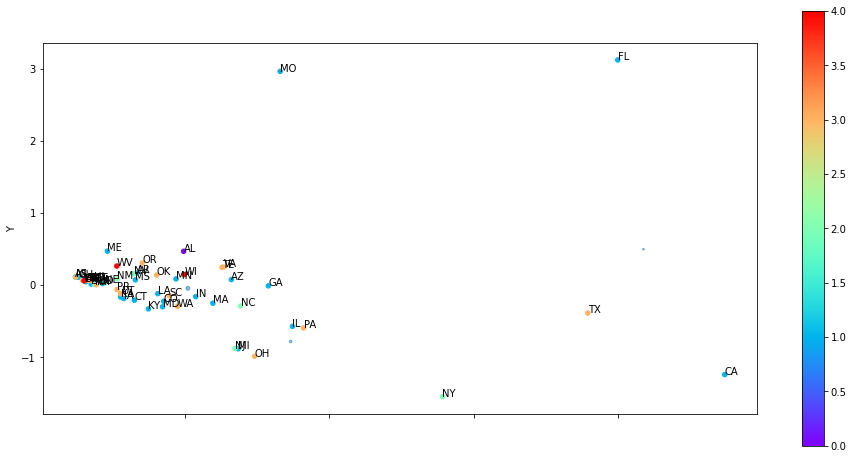

In [ ]:
X = reduced.X
Y = reduced.Y
X2 = clusterReduce.X
Y2 = clusterReduce.Y
ax = reduced.plot.scatter('X', 'Y', c = stateCluster.Cluster, colormap = 'rainbow', figsize = (16, 8))
clusterReduce.plot.scatter('X', 'Y', s = size.Size, colormap = 'rainbow', alpha = 0.5, figsize = (16, 8), ax=ax)

ab = pandas.read_csv('Abbreviations.csv')

ax.axis('scaled')
for i,r in enumerate(ab):
    ax.annotate(r, (X[i], Y[i]))


IndexError: index 51 is out of bounds for axis 0 with size 51

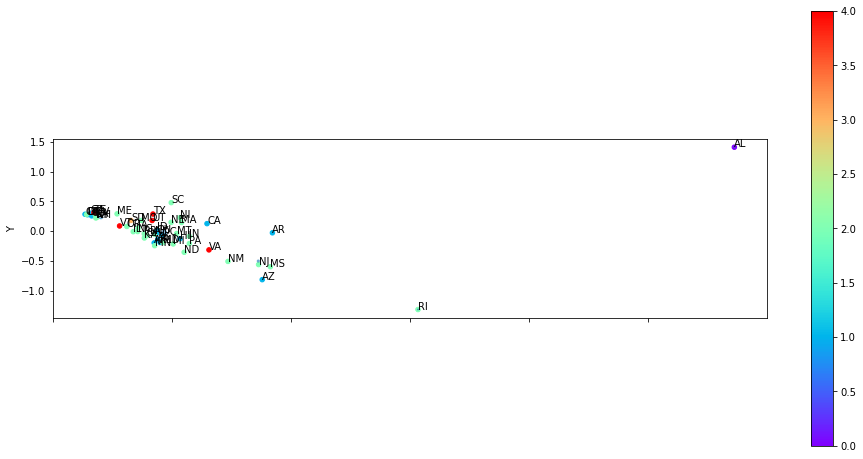

In [145]:
mainX = mainReduced.X
mainY = mainReduced.Y
mainX2 = mainClusterReduce.X
mainY2 = mainClusterReduce.Y
mainAX = mainReduced.plot.scatter('X', 'Y', c = mainCluster.Cluster, colormap = 'rainbow', figsize = (16, 8))
mainClusterReduce.plot.scatter('X', 'Y', s = mainSize.Size, colormap = 'rainbow', alpha = 0.5, figsize = (16, 8), ax=mainAX)

ab = pandas.read_csv('Abbreviations.csv')

mainAX.axis('scaled')
for i,r in enumerate(ab):
    mainAX.annotate(r, (mainX[i], mainY[i]))



### Changes and work distribution


We stayed the original course of analyzing covid19 route, however, we decided to focus in on the relationship with covid and vaccines to prove if the vaccines really helped with slowing the spread of covid. Another thing we changed was that we changed was the project notebook due to technical difficulties with the colab notebook which we previously used.

Emilio: Worked on cleaning up the cases and death data points as well as the bar graphs.
Will Pham: Worked on data gathering and the elbow/ k graph and scatter points.
Ari: Worked on creating the other scatter graph and clusters.
Will Yao: Worked on data cleaning, data gathering.

## Conclusion